In [1]:
!pip install BeautifulSoup4 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install requests



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
headers={'User-Agent':'Mozilla/5.0 (iPhone; CPU iPhone OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

In [4]:
headers

{'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

In [5]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
Apple5c_reviews= []


In [6]:
Apple5c_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/195272016/reviews?"
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        Apple5c_snapdeal= Apple5c_snapdeal+ip

In [7]:
### Removing repeated reviews 
Apple5c_snapdeal = list(set(Apple5c_snapdeal))


In [8]:
Apple5c_snapdeal

["I'm also happy with Snapdeal service",
 'Best phone my iPhone',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'goood.. fast shipping',
 'I am really happy with product',
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.',
 'dream come true',
 'Its an awesome phone',
 'Good phone',
 'The product supplied by Snapdeal is very good at best price. It is as shown']

In [9]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(Apple5c_snapdeal))

In [10]:
Apple5c_snapdeal

["I'm also happy with Snapdeal service",
 'Best phone my iPhone',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'goood.. fast shipping',
 'I am really happy with product',
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.',
 'dream come true',
 'Its an awesome phone',
 'Good phone',
 'The product supplied by Snapdeal is very good at best price. It is as shown']

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
#from google.colab import files
#files.download("ip_snapdeal.txt") 

In [13]:
Ap_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
Ap_snapd

,"[""I'm also happy with Snapdeal service""",'Best phone my iPhone',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'goood.. fast shipping','I am really happy with product','it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.','dream come true','Its an awesome phone','Good phone','The product supplied by Snapdeal is very good at best price. It is as shown']


In [14]:
Ap_snapd= ' '.join(Ap_snapd)
Ap_snapd


'["I\'m also happy with Snapdeal service"  \'Best phone my iPhone\'  "The OS will take around 5GB  leaving only 3 GB for your files. Unless you\'re not a heavy files user."  \'goood.. fast shipping\'  \'I am really happy with product\'  \'it is simple \\nall the thing that u need it having it \\nI have buy it 2 year before from snapdeal and still it is in perfect condition.\\nno lagging till today\\nsuitable for your business need.\'  \'dream come true\'  \'Its an awesome phone\'  \'Good phone\'  \'The product supplied by Snapdeal is very good at best price. It is as shown\']'

In [15]:
# Remove Punctuations 
no_punc_text= Ap_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Im also happy with Snapdeal service  Best phone my iPhone  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  goood fast shipping  I am really happy with product  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  dream come true  Its an awesome phone  Good phone  The product supplied by Snapdeal is very good at best price It is as shown'

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Im also happy with Snapdeal service  Best phone my iPhone  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  goood fast shipping  I am really happy with product  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  dream come true  Its an awesome phone  Good phone  The product supplied by Snapdeal is very good at best price It is as shown'

In [18]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['Im', 'also', 'happy', 'with', 'Snapdeal', 'service', 'Best', 'phone', 'my', 'iPhone', 'The', 'OS', 'will', 'take', 'around', '5GB', 'leaving', 'only', '3', 'GB', 'for', 'your', 'files', 'Unless', 'youre', 'not', 'a', 'heavy', 'files', 'user', 'goood', 'fast', 'shipping', 'I', 'am', 'really', 'happy', 'with', 'product', 'it', 'is', 'simple', 'nall', 'the', 'thing', 'that', 'u', 'need', 'it', 'having', 'it', 'nI', 'have', 'buy', 'it', '2', 'year', 'before', 'from', 'snapdeal', 'and', 'still', 'it', 'is', 'in', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'for', 'your', 'business', 'need', 'dream', 'come', 'true', 'Its', 'an', 'awesome', 'phone', 'Good', 'phone', 'The', 'product', 'supplied', 'by', 'Snapdeal', 'is', 'very', 'good', 'at', 'best', 'price', 'It', 'is', 'as', 'shown']


In [19]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Tokens count
len(text_tokens)

98

In [21]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Im', 'also', 'happy', 'Snapdeal', 'service', 'Best', 'phone', 'iPhone', 'The', 'OS', 'take', 'around', '5GB', 'leaving', '3', 'GB', 'files', 'Unless', 'youre', 'heavy', 'files', 'user', 'goood', 'fast', 'shipping', 'really', 'happy', 'product', 'simple', 'nall', 'thing', 'u', 'need', 'nI', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'dream', 'come', 'true', 'Its', 'awesome', 'phone', 'Good', 'phone', 'The', 'product', 'supplied', 'Snapdeal', 'good', 'best', 'price', 'It', 'shown']


In [22]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

[]


In [23]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])


[]


In [24]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

im also happy snapdeal service best phone iphone the os take around 5gb leaving 3 gb files unless youre heavy files user goood fast shipping really happy product simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need dream come true its awesome phone good phone the product supplied snapdeal good best price it shown


In [25]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['I', 'm', 'also', 'happy', 'snapdeal', 'service', 'good', 'phone', 'iphone', 'the', 'os', 'take', 'around', '5', 'gb', 'leave', '3', 'gb', 'file', 'unless', 'you', 're', 'heavy', 'file', 'user', 'goood', 'fast', 'shipping', 'really', 'happy', 'product', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'dream', 'come', 'true', 'its', 'awesome', 'phone', 'good', 'phone', 'the', 'product', 'supply', 'snapdeal', 'good', 'good', 'price', 'it', 'show']


In [26]:
clean_comments= ' '.join(lemmas)
clean_comments

'I m also happy snapdeal service good phone iphone the os take around 5 gb leave 3 gb file unless you re heavy file user goood fast shipping really happy product simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need dream come true its awesome phone good phone the product supply snapdeal good good price it show'

In [27]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [28]:
print(cv.vocabulary_)

{'also': 0, 'happy': 13, 'snapdeal': 34, 'service': 30, 'good': 11, 'phone': 25, 'iphone': 15, 'the': 38, 'os': 23, 'take': 37, 'around': 1, 'gb': 10, 'leave': 19, 'file': 9, 'unless': 43, 'you': 46, 're': 28, 'heavy': 14, 'user': 44, 'goood': 12, 'fast': 8, 'shipping': 31, 'really': 29, 'product': 27, 'simple': 33, 'nall': 20, 'thing': 39, 'need': 21, 'ni': 22, 'buy': 4, 'year': 45, 'still': 35, 'perfect': 24, 'conditionnno': 6, 'lagging': 18, 'till': 40, 'todaynsuitable': 41, 'business': 3, 'dream': 7, 'come': 5, 'true': 42, 'its': 17, 'awesome': 2, 'supply': 36, 'price': 26, 'it': 16, 'show': 32}


In [29]:
print(cv.get_feature_names_out()[100:200])

[]


In [30]:
print(clean_commentscv.toarray()[100:200])

[]


In [31]:
print(clean_commentscv.toarray().shape)

(66, 47)


In [32]:
#ngram
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [33]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['also' 'around' 'awesome' 'business' 'buy' 'come' 'conditionnno' 'dream'
 'fast' 'file' 'gb' 'good' 'goood' 'happy' 'heavy' 'iphone' 'it' 'its'
 'lagging' 'leave' 'nall' 'need' 'ni' 'os' 'perfect' 'phone' 'price'
 'product' 're' 'really' 'service' 'shipping' 'show' 'simple' 'snapdeal'
 'still' 'supply' 'take' 'the' 'thing' 'till' 'todaynsuitable' 'true'
 'unless' 'user' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

In [35]:
#Generate WordCloud
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

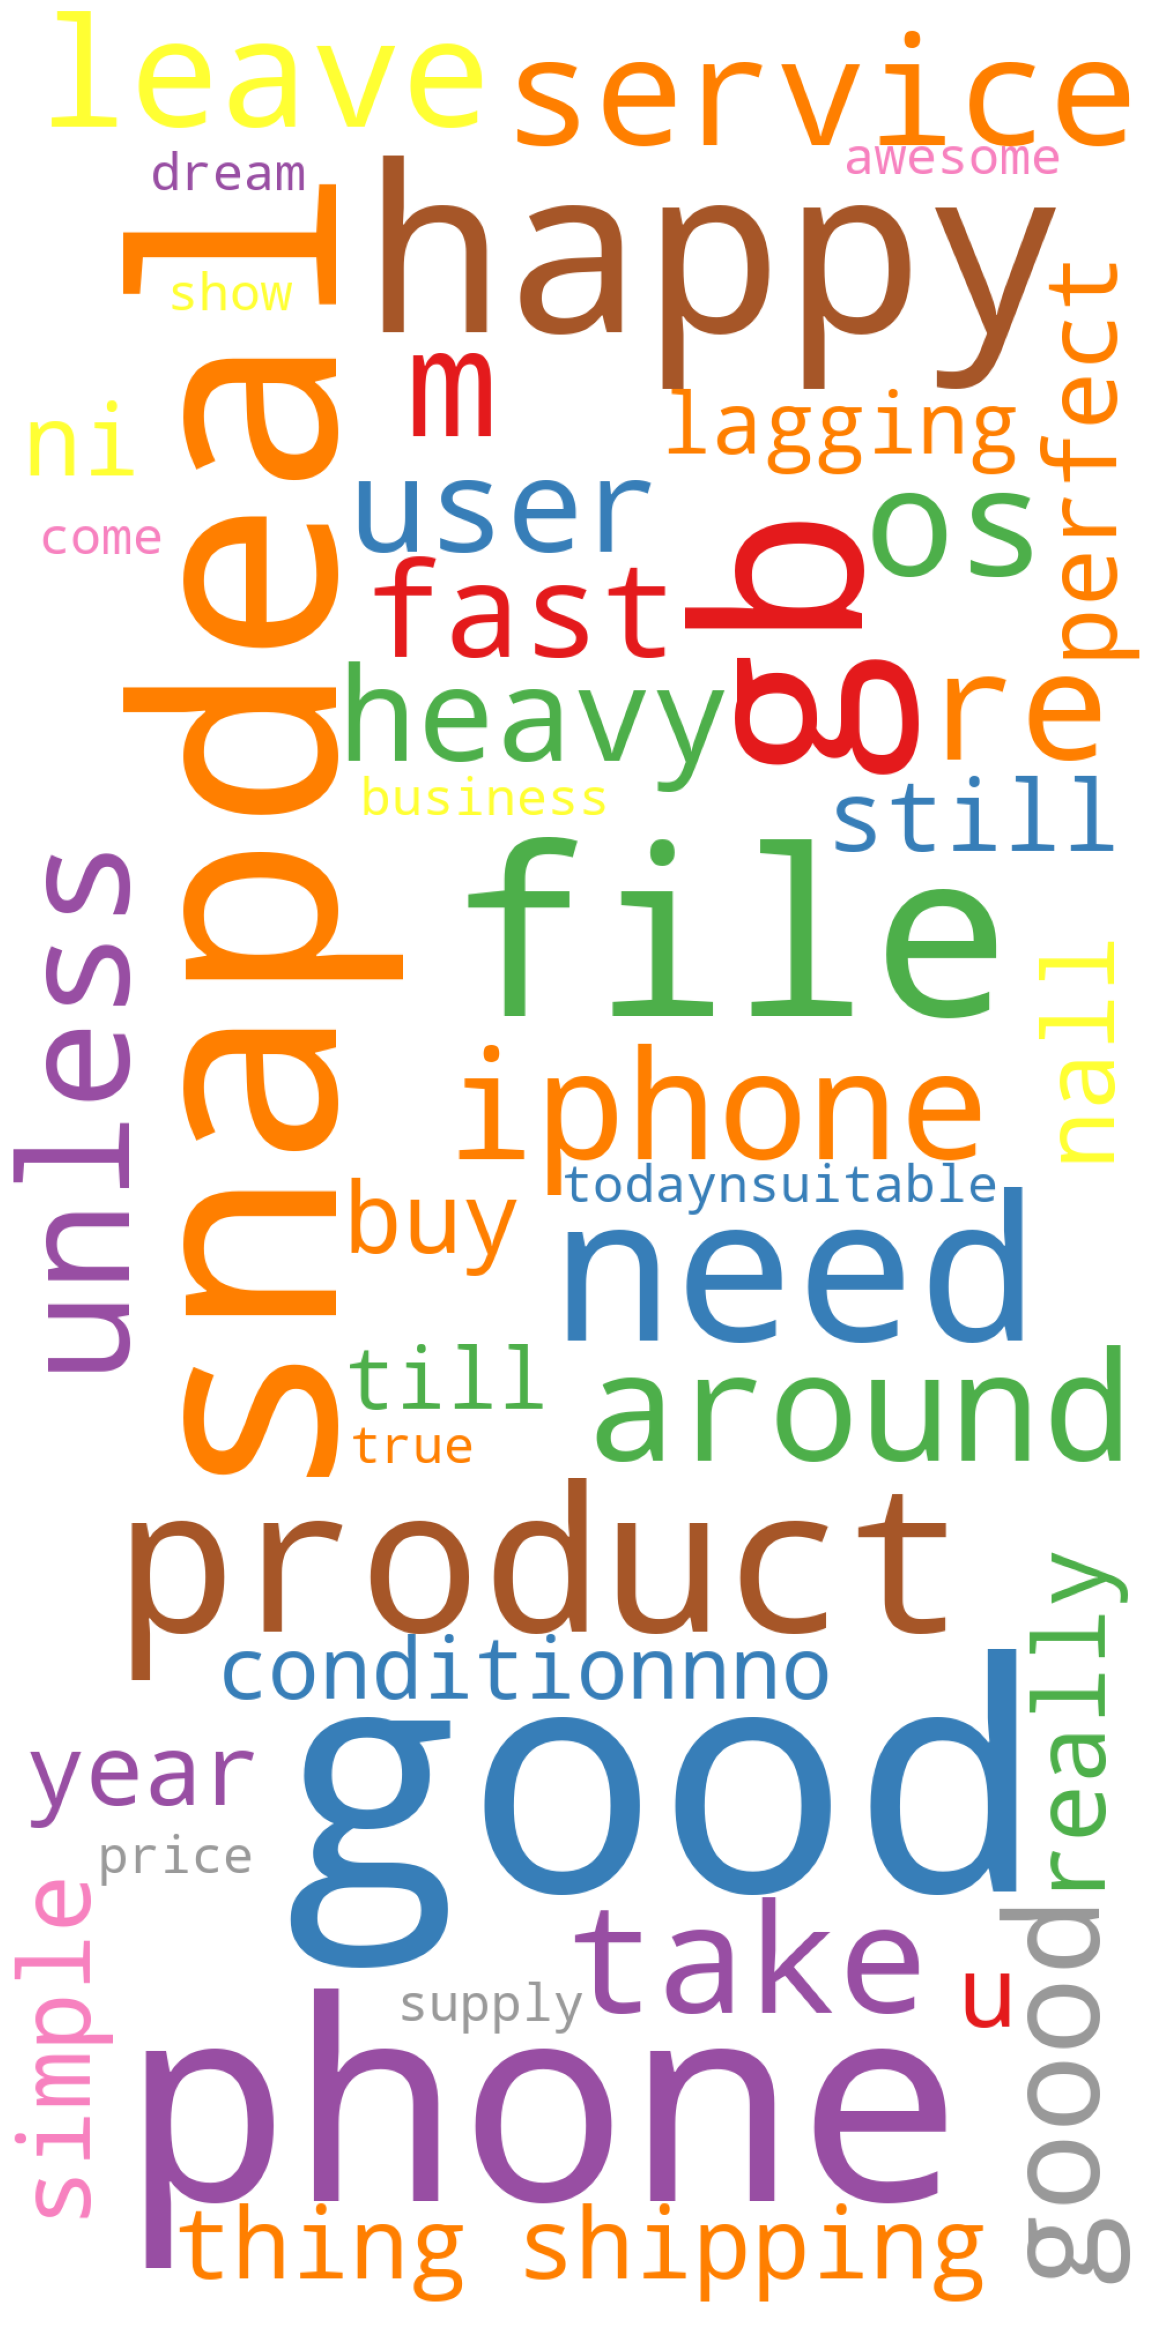

In [36]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 1000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

In [37]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [38]:
for token in doc_block[100:200]:
    print(token,token.pos_)

In [39]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])


[]


In [40]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:9]

,word,count
0,phone,3
1,gb,2
2,file,2
3,product,2
4,need,2
5,service,1
6,iphone,1
7,take,1
8,leave,1


In [41]:
#Emotion Mining
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(Apple5c_snapdeal))
sentences

["I'm also happy with Snapdeal service Best phone my iPhone The OS will take around 5GB, leaving only 3 GB for your files.",
 "Unless you're not a heavy files user.",
 'goood.. fast shipping I am really happy with product it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.',
 'no lagging till today\nsuitable for your business need.',
 'dream come true Its an awesome phone Good phone The product supplied by Snapdeal is very good at best price.',
 'It is as shown']

In [42]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I'm also happy with Snapdeal service Best phon...
1,Unless you're not a heavy files user.
2,goood.. fast shipping I am really happy with p...
3,no lagging till today\nsuitable for your busin...
4,dream come true Its an awesome phone Good phon...
5,It is as shown


In [43]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [44]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [45]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [46]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [47]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     5
1     0
2     6
3    -3
4    14
5     0
Name: sentiment_value, dtype: int64

In [48]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0    23
1     7
2    37
3     9
4    20
5     4
Name: word_count, dtype: int64

In [49]:
sent_df.sort_values(by= 'sentiment_value')

,sentence,sentiment_value,word_count
3,no lagging till today\nsuitable for your busin...,-3,9
1,Unless you're not a heavy files user.,0,7
5,It is as shown,0,4
0,I'm also happy with Snapdeal service Best phon...,5,23
2,goood.. fast shipping I am really happy with p...,6,37
4,dream come true Its an awesome phone Good phon...,14,20


In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count     6.000000
mean      3.666667
std       6.088240
min      -3.000000
25%       0.000000
50%       2.500000
75%       5.750000
max      14.000000
Name: sentiment_value, dtype: float64

In [51]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,Unless you're not a heavy files user.,0,7
3,no lagging till today\nsuitable for your busin...,-3,9
5,It is as shown,0,4


In [52]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,I'm also happy with Snapdeal service Best phon...,5,23
2,goood.. fast shipping I am really happy with p...,6,37
4,dream come true Its an awesome phone Good phon...,14,20


In [53]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I'm also happy with Snapdeal service Best phon...,5,23,0
1,Unless you're not a heavy files user.,0,7,1
2,goood.. fast shipping I am really happy with p...,6,37,2
3,no lagging till today\nsuitable for your busin...,-3,9,3
4,dream come true Its an awesome phone Good phon...,14,20,4
5,It is as shown,0,4,5
